## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install quandl

In [3]:
import quandl

## **Importing and arranging data**

In [4]:
start = pd.to_datetime('2012-12-31')
end = pd.to_datetime('2022-12-31')

In [5]:
google_data = quandl.get("WIKI/GOOGL", start_date = start, end_date = end, authtoken='Y9HA-dgk5uB8osFnUF8M')
amazon_data = quandl.get("WIKI/AMZN",start_date = start, end_date = end, authtoken='Y9HA-dgk5uB8osFnUF8M')
tesla_data = quandl.get("WIKI/TSLA",start_date = start, end_date = end, authtoken='Y9HA-dgk5uB8osFnUF8M')

google_data.rename(columns={"Adj. Close": "GOOGL"}, inplace=True)
amazon_data.rename(columns={"Adj. Close": "AMZN"}, inplace=True)
tesla_data.rename(columns={"Adj. Close": "TSLA"}, inplace=True)

google_data = google_data['GOOGL']
amazon_data = amazon_data['AMZN']
tesla_data = tesla_data['TSLA']

# Print the first 5 rows of data for each stock
print(google_data.head())
print(amazon_data.head())
print(tesla_data.head())

Date
2012-12-31    354.785188
2013-01-02    362.744758
2013-01-03    362.955409
2013-01-04    370.127548
2013-01-07    368.512563
Name: GOOGL, dtype: float64
Date
2012-12-31    250.8700
2013-01-02    257.3100
2013-01-03    258.4800
2013-01-04    259.1500
2013-01-07    268.4592
Name: AMZN, dtype: float64
Date
2012-12-31    33.87
2013-01-02    35.36
2013-01-03    34.77
2013-01-04    34.40
2013-01-07    34.34
Name: TSLA, dtype: float64


## **PortFolio**

In [6]:

# Concatenate the dataframes by date
portfolio = pd.concat([google_data, amazon_data, tesla_data], axis=1)

In [7]:
portfolio

,GOOGL,AMZN,TSLA
Date,,,
2012-12-31,354.785188,250.8700,33.87
2013-01-02,362.744758,257.3100,35.36
2013-01-03,362.955409,258.4800,34.77
2013-01-04,370.127548,259.1500,34.40
2013-01-07,368.512563,268.4592,34.34
...,...,...,...
2018-03-21,1094.000000,1581.8600,316.53
2018-03-22,1053.150000,1544.1000,309.10
2018-03-23,1026.550000,1495.5600,301.54


### **Visualizing data of 10 years**

<Axes: xlabel='Date'>

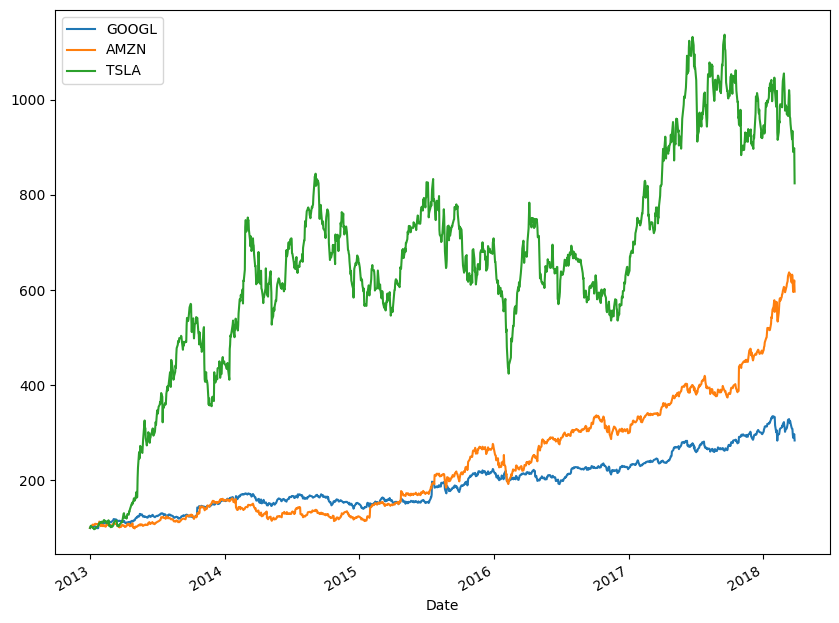

In [8]:
(portfolio / portfolio.iloc[0]* 100 ).plot(figsize = (10,8))

### **Annual daily mean**

In [9]:
google_returns = google_data.pct_change()
amazon_returns = amazon_data.pct_change()
tesla_returns = tesla_data.pct_change()

In [10]:
google_mean = google_returns.mean() * 252
amazon_mean = amazon_returns.mean() * 252
tesla_mean = tesla_returns.mean() * 252

In [11]:
print("Annual daily mean:")
print("GOOGL: ", google_mean)
print("AMZN: ", amazon_mean)
print("TSLA: ", tesla_mean)

Annual daily mean:
GOOGL:  0.22437900794872692
AMZN:  0.38435770588949786
TSLA:  0.5137677032314029


### **Daily standard Mean**

In [12]:
google_mean = google_returns.mean()
amazon_mean = amazon_returns.mean()
tesla_mean = tesla_returns.mean()

In [13]:
print("Daily standard mean:")
print("GOOGL: ", google_mean)
print("AMZN: ", amazon_mean)
print("TSLA: ", tesla_mean)

Daily standard mean:
GOOGL:  0.0008903928886854243
AMZN:  0.0015252289916249915
TSLA:  0.0020387607271087414


### **Correlation**

<Axes: >

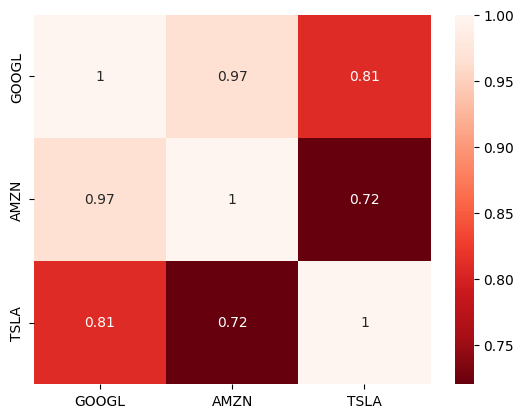

In [14]:
corel = portfolio.corr()
sns.heatmap(corel, annot = True, cmap = 'Reds_r')

### **Sharpe Ratio**

In [15]:
google_sharpe = google_mean / google_returns.std() * 252**0.5
amazon_sharpe = amazon_mean / amazon_returns.std() * 252**0.5
tesla_sharpe = tesla_mean / tesla_returns.std() * 252**0.5

In [16]:
print('Sharpe Ratio')
print('GOOGLE: ',google_sharpe)
print('AMAZON: ', amazon_sharpe)
print('TESLA: ', tesla_sharpe)

Sharpe Ratio
GOOGLE:  1.0014520664849391
AMAZON:  1.3198832485461807
TESLA:  1.0883958168871812


### **Expected Returns**

In [17]:
stocks = ['GOOGLE', 'AMAZON', 'TESLA']

In [18]:
len(stocks)

3

In [19]:
logReturns = np.log(portfolio/portfolio.shift(1))
logReturns

,GOOGL,AMZN,TSLA
Date,,,
2012-12-31,NaN,NaN,NaN
2013-01-02,0.022187,0.025347,0.043052
2013-01-03,0.000581,0.004537,-0.016826
2013-01-04,0.019568,0.002589,-0.010698
2013-01-07,-0.004373,0.035292,-0.001746
...,...,...,...
2018-03-21,-0.001644,-0.002935,0.019073
2018-03-22,-0.038055,-0.024160,-0.023753
2018-03-23,-0.025582,-0.031940,-0.024762


In [20]:

expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []
weightList2 = []
# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(len(stocks))
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    weightList2.append(weights[2])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for GOOGLE
weightList1 = np.array(weightList1) #Weights for AMAZON
weightList2 = np.array(weightList2) #Weights for TESLA
expectedReturn = np.array(expectedReturn)
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of GOOGLE": weightList0, "Weight of AMAZON": weightList1, "Weight of TESLA": weightList2,"Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of GOOGLE,Weight of AMAZON,Weight of TESLA,Expected Return,Standard deviation
0,0.345171,0.296928,0.357902,0.312364,0.251955
1,0.349425,0.502665,0.147910,0.298905,0.229557
2,0.399790,0.351807,0.248404,0.297949,0.231945
3,0.351664,0.245813,0.402524,0.314180,0.260988
4,0.408564,0.518678,0.072758,0.285955,0.225894


### **Markowitz Frontier**

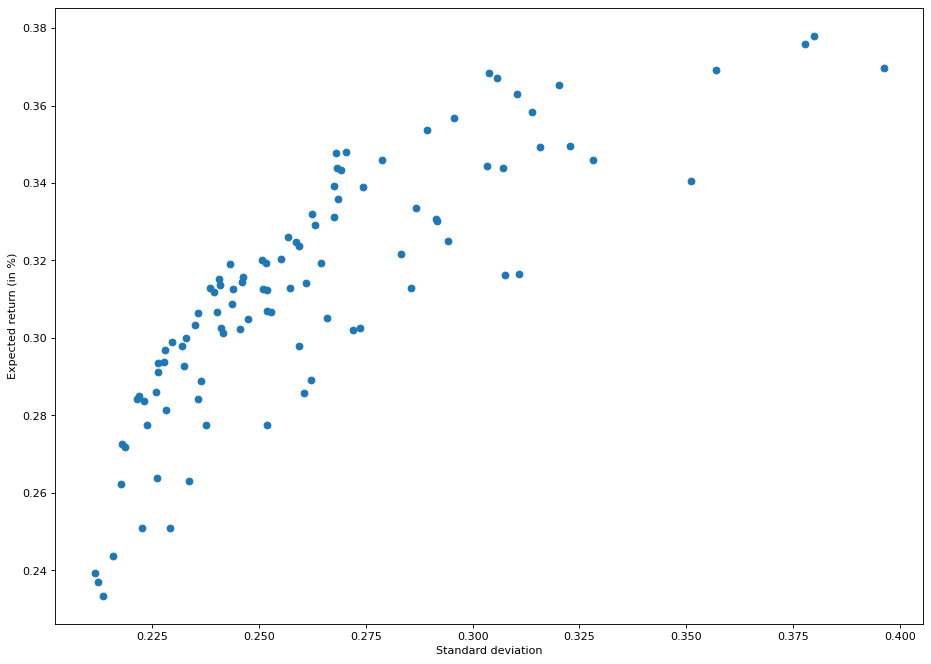

In [21]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

### **Optimal portfolio and the different parameters evaluated for the portfolio**

In [22]:
df[(df["Expected Return"]>0.3)].sort_values(by=['Expected Return']).head(10)

,Weight of GOOGLE,Weight of AMAZON,Weight of TESLA,Expected Return,Standard deviation
57,0.385331,0.365272,0.249396,0.300051,0.232950
61,0.285464,0.676543,0.037993,0.301202,0.241685
14,0.461189,0.082015,0.456796,0.302044,0.271964
93,0.407873,0.252001,0.340127,0.302425,0.245649
20,0.394537,0.294365,0.311098,0.302530,0.241043
23,0.460217,0.076665,0.463118,0.302568,0.273726
62,0.301129,0.591904,0.106968,0.303215,0.235002
29,0.393633,0.260344,0.346023,0.304796,0.247372
82,0.428368,0.139293,0.432339,0.305179,0.265865
80,0.287818,0.582338,0.129844,0.306494,0.235807
